In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [10]:
import pandas as pd
df = pd.read_csv('../data/movie_ratings.csv')

In [11]:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212595 entries, 0 to 212594
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      212595 non-null  int64  
 1   movie_id     212595 non-null  int64  
 2   rating       212595 non-null  int64  
 3   timestamp    212595 non-null  object 
 4   age          212595 non-null  int64  
 5   gender       212595 non-null  object 
 6   occupation   212595 non-null  object 
 7   zip_code     212595 non-null  object 
 8   title        212595 non-null  object 
 9   year         212559 non-null  float64
 10  decade       212559 non-null  float64
 11  genres       212595 non-null  object 
 12  rating_year  212595 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 21.1+ MB
None
             user_id       movie_id         rating            age  \
count  212595.000000  212595.000000  212595.000000  212595.000000   
mean      464.525643     390.545173   

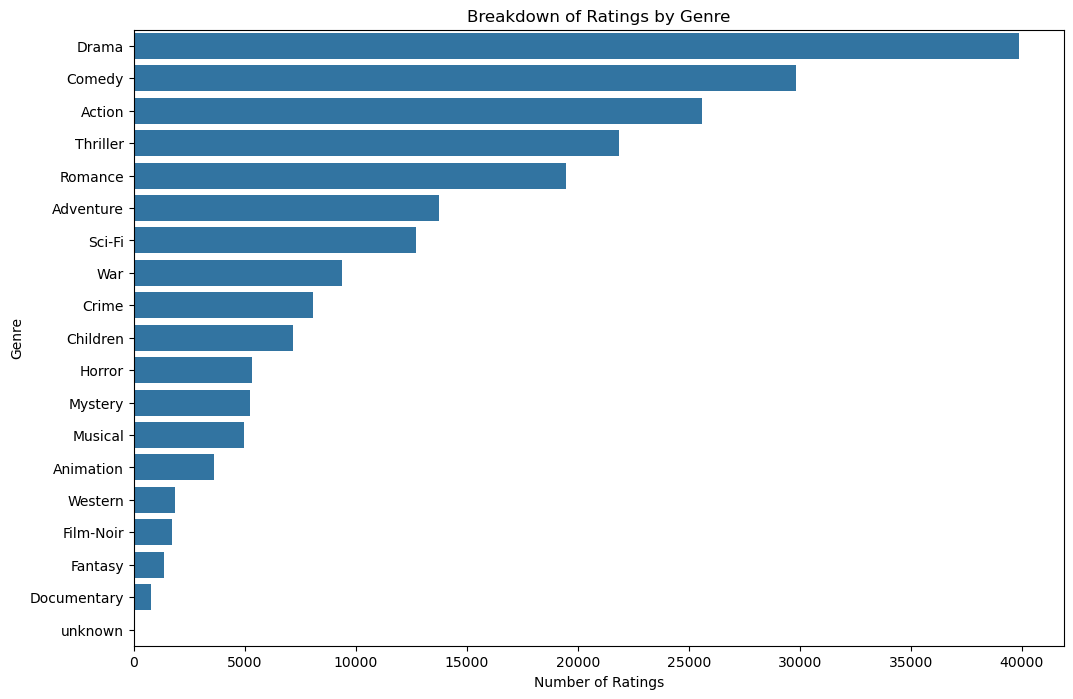

In [13]:
# 1. What's the breakdown of genres for the movies that were rated?

exploded_genres = df.assign(genres=df['genres'].str.split('|')).explode('genres')

genre_counts = exploded_genres['genres'].value_counts().reset_index()
genre_counts.columns = ['genre', 'number_of_ratings']

plt.figure(figsize=(12, 8))
sns.barplot(data=genre_counts, x='number_of_ratings', y='genre')
plt.title('Breakdown of Ratings by Genre')
plt.xlabel('Number of Ratings')
plt.ylabel('Genre')
plt.show()

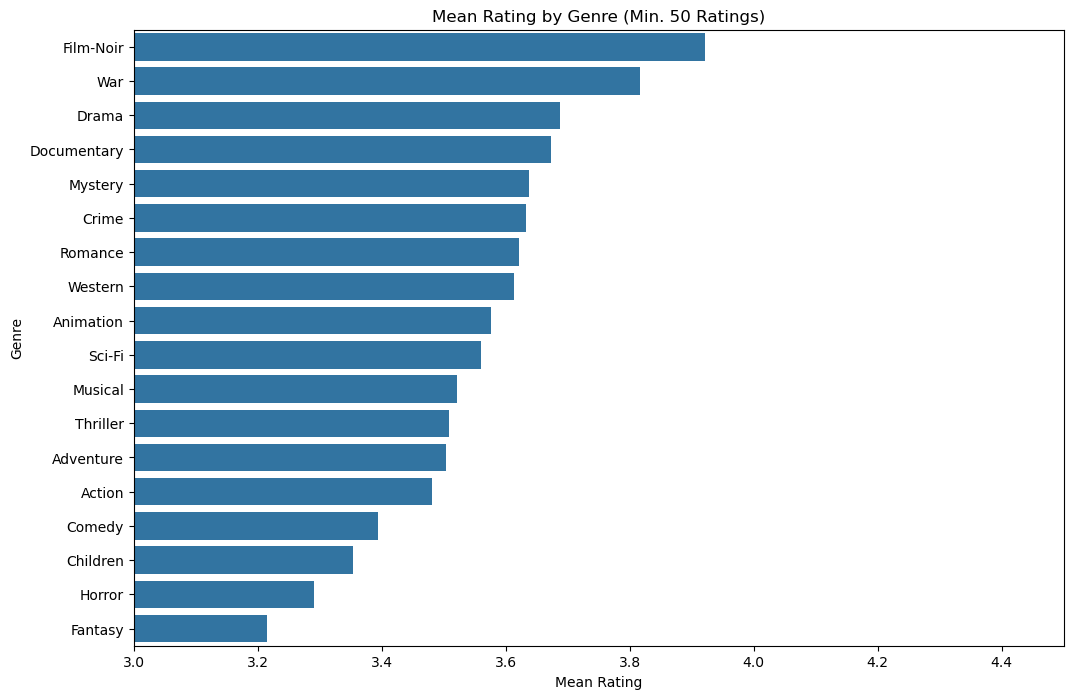

In [ ]:
# 2. Which genres have the highest viewer satisfaction (highest ratings)

genre_satisfaction = exploded_genres.groupby('genres')['rating'].agg(['mean', 'count']).reset_index()
genre_satisfaction.columns = ['genre', 'mean_rating', 'rating_count']

min_ratings_threshold = 50
genre_satisfaction_filtered = genre_satisfaction[genre_satisfaction['rating_count'] >= min_ratings_threshold]

genre_satisfaction_filtered = genre_satisfaction_filtered.sort_values(by='mean_rating', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=genre_satisfaction_filtered, x='mean_rating', y='genre')
plt.title(f'Mean Rating by Genre (Min. {min_ratings_threshold} Ratings)')
plt.xlabel('Mean Rating')
plt.ylabel('Genre')
plt.xlim(3.0, 4.5)
plt.show()

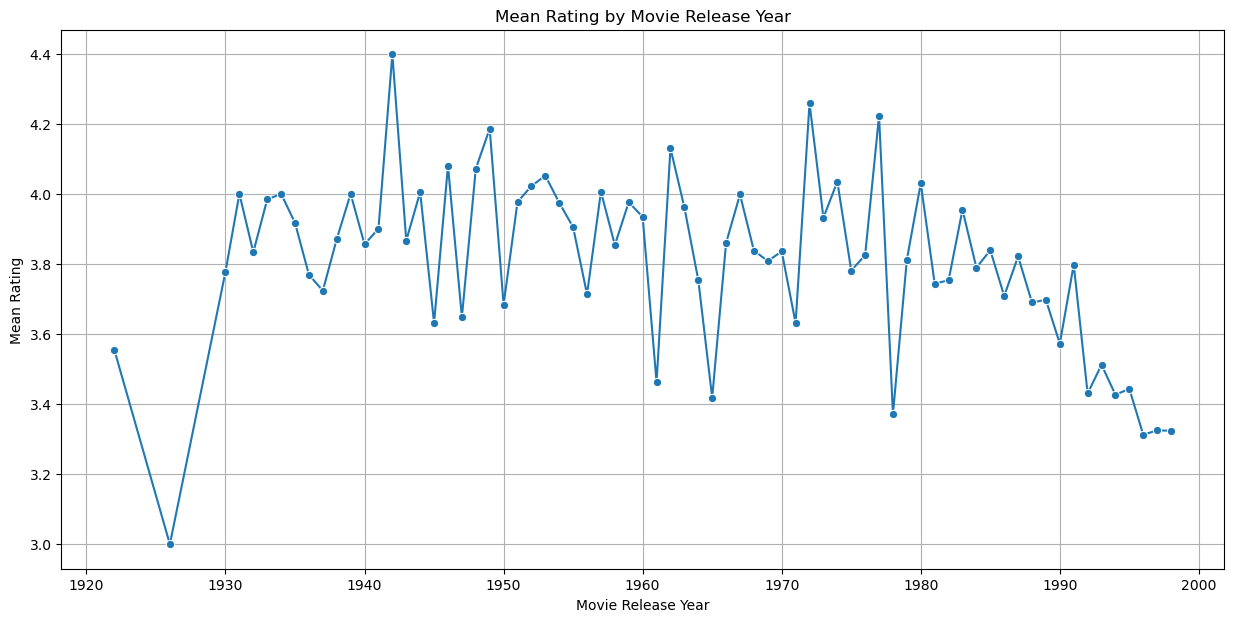

In [ ]:
# 3. How does mean rating change across movie release years?
ratings_by_year = df.groupby('year')['rating'].mean().reset_index()

plt.figure(figsize=(15, 7))
sns.lineplot(data=ratings_by_year, x='year', y='rating', marker='o')
plt.title('Mean Rating by Movie Release Year')
plt.xlabel('Movie Release Year')
plt.ylabel('Mean Rating')
plt.grid(True)
plt.show()

In [19]:
# 4. What are the 5 best-rated movies that have at least 50 ratings? At least 150 ratings?
# Group by movie title and calculate mean rating and count
movie_ratings = df.groupby('title')['rating'].agg(['mean', 'count']).reset_index()
movie_ratings.columns = ['title', 'mean_rating', 'rating_count']

# Filter and sort for at least 50 ratings
best_50_ratings = movie_ratings[movie_ratings['rating_count'] >= 50].sort_values(
    by='mean_rating', ascending=False
).head(5)

print("Top 5 Movies with at least 50 ratings:")
print(best_50_ratings)

# Filter and sort for at least 150 ratings
best_150_ratings = movie_ratings[movie_ratings['rating_count'] >= 150].sort_values(
    by='mean_rating', ascending=False
).head(5)

print("\nTop 5 Movies with at least 150 ratings:")
print(best_150_ratings)

Top 5 Movies with at least 50 ratings:
                                                  title  mean_rating  \
318                               Close Shave, A (1995)     4.491071   
1281                            Schindler's List (1993)     4.466443   
1652                         Wrong Trousers, The (1993)     4.466102   
273                                   Casablanca (1942)     4.456790   
1597  Wallace & Gromit: The Best of Aardman Animatio...     4.447761   

      rating_count  
318            336  
1281           596  
1652           236  
273            729  
1597            67  

Top 5 Movies with at least 150 ratings:
                                 title  mean_rating  rating_count
318              Close Shave, A (1995)     4.491071           336
1281           Schindler's List (1993)     4.466443           596
1652        Wrong Trousers, The (1993)     4.466102           236
273                  Casablanca (1942)     4.456790           729
1317  Shawshank Redemption, The

In [20]:
# 5. Rating Change with Viewer Age for Selected Genres
# Select a few interesting genres to compare
selected_genres = ['Sci-Fi', 'Comedy', 'Drama', 'Horror', 'Romance']
age_genre_df = exploded_genres[exploded_genres['genres'].isin(selected_genres)]

# Group by age and genre to get the mean rating
age_genre_ratings = age_genre_df.groupby(['age', 'genres'])['rating'].mean().reset_index()

# Create an interactive line chart
fig = px.line(
    age_genre_ratings,
    x='age',
    y='rating',
    color='genres',
    title='Mean Rating by Viewer Age for Selected Genres',
    labels={'age': 'Viewer Age', 'rating': 'Mean Rating'}
)
fig.show()

In [21]:
# 6. Plot number of ratings vs mean rating per genre.
# Create an interactive scatter plot
fig = px.scatter(
    genre_satisfaction_filtered,
    x='rating_count',
    y='mean_rating',
    text='genre',
    title='Number of Ratings vs. Mean Rating per Genre',
    labels={'rating_count': 'Number of Ratings', 'mean_rating': 'Mean Rating'},
    hover_name='genre'
)
fig.update_traces(textposition='top center')
fig.show()